### NETFLIX ANALYSIS PROJECT 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 

In [2]:
# Load the Netflix dataset
netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
netflix_data.shape
 

(8807, 12)

In [4]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
netflix_data.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
netflix_data.duplicated().sum()

0

In [8]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# Fill missing values in the "director" and "cast" columns with "Unknown"
netflix_data["director"].fillna("Unknown", inplace=True)
netflix_data["cast"].fillna("Unknown", inplace=True)

In [10]:
# Fill missing values in the "country" column with the most frequent country
most_frequent_country = netflix_data["country"].mode().iloc[0]
netflix_data["country"].fillna(most_frequent_country, inplace=True)

In [11]:
netflix_data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [12]:
#using the with mode function to replace missing data the columns 'date_added', 'rating', 'duration'
mode = ['date_added', 'rating', 'duration']
for i in mode:
    netflix_data[i] = netflix_data[i].fillna(netflix_data[i].mode()[0])

In [13]:
netflix_data['year'] = netflix_data['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_data['month'] = netflix_data['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

In [14]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year            0
month           0
dtype: int64

In [15]:
netflix_data["year"]

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: year, Length: 8807, dtype: object

In [16]:
#select relevant columns for analysis
selected_columns = ["show_id", "title", "type", "country", "rating", "duration", "release_year"]
netflix_data_selected = netflix_data[selected_columns]


In [17]:
#cleaning rating column
netflix_data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [18]:
netflix_data['rating'] = netflix_data['rating'].replace({'74 min' : np.nan, '84 min' : np.nan, '66 min': np.nan
                                    , 'TV-Y7-FV' : 'TV-Y7'})
netflix_data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'UR'], dtype=object)

In [19]:
types = netflix_data['type'].value_counts().reset_index()
types

,type,count
0,Movie,6131
1,TV Show,2676


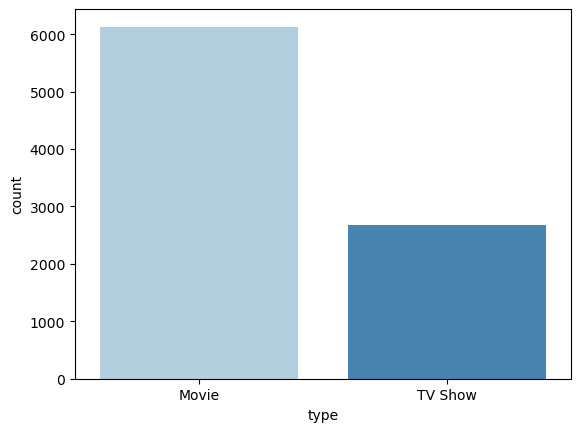

In [20]:
#visualization
sns.countplot(x ='type', data = netflix_data, palette="Blues")
plt.show()

In [21]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
netflix_data1 = netflix_data.groupby('year')['month'].value_counts().unstack()[month]

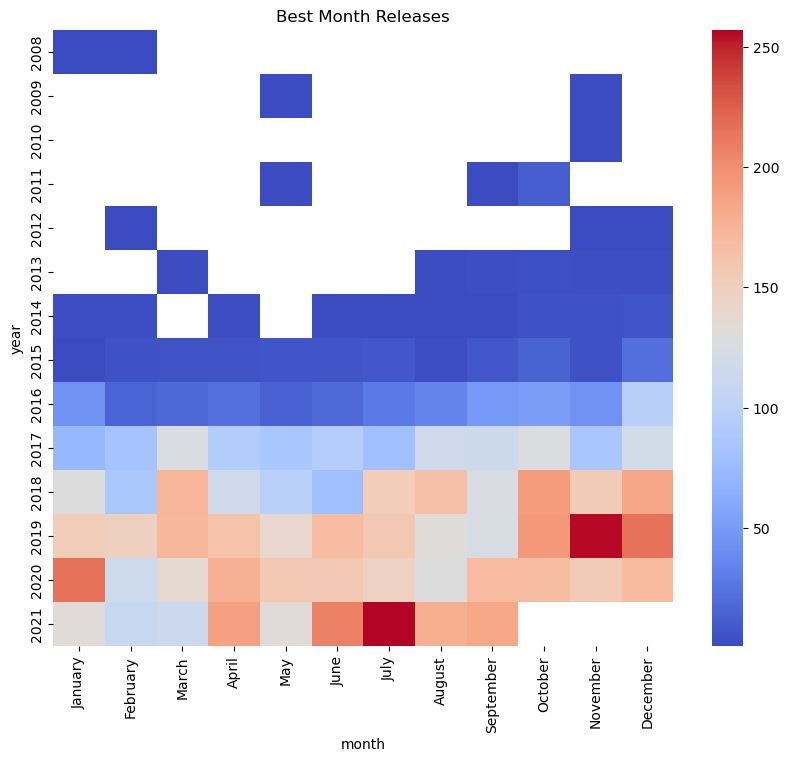

In [22]:
#print(netflix_data).value_counts() 
fig,ax = plt.subplots(1,1,figsize = (10,8))
ax = sns.heatmap(netflix_data1,cmap="coolwarm")
plt.title('Best Month Releases')
plt.show()

In [23]:
#According to the data from the most recent complete year, 2020, the most favorable months for adding new content are February, March, and May.

In [24]:
#creating a dataframe for movies
movie = (netflix_data['type'] == 'Movie')
movie_count = netflix_data[movie]
movie_count.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,September
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,September
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,September


In [25]:
#creating a dataframe for tv show
tv_show = (netflix_data['type'] == 'TV Show')
tvscount = netflix_data[tv_show]
tvscount.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,September


In [26]:
#movie genres
genres = {}
for genre in movie_count['listed_in']:
    for i in genre.split(','):
        i=i.strip()
        if i not in genres:
            genres[i] = 1
        else:
            genres[i] += 1
        
genre_movie_count = pd.DataFrame(list(genres.items()), columns= ['Genre', 'Number of Movies'])
genre_movie_count['Genre'].unique()

array(['Documentaries', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'Comedies',
       'Thrillers', 'Romantic Movies', 'Music & Musicals',
       'Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure',
       'Classic Movies', 'Anime Features', 'Sports Movies', 'Cult Movies',
       'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy',
       'Movies'], dtype=object)

In [27]:
genres = {}
for genre in movie_count['listed_in']:
    # Skip if genre is an empty string
    if not genre:
        continue
    for i in genre.split(','):
        i = i.strip()
        if i not in genres:
            genres[i] = 1
        else:
            genres[i] += 1

# Only create DataFrame if genres is not empty
if genres:
    genre_movie_count = pd.DataFrame(list(genres.items()), columns= ['Genre', 'Number of Movies'])
    print(genre_movie_count['Genre'].unique())
else:
    print("No genres found.")


['Documentaries' 'Children & Family Movies' 'Dramas' 'Independent Movies'
 'International Movies' 'Comedies' 'Thrillers' 'Romantic Movies'
 'Music & Musicals' 'Horror Movies' 'Sci-Fi & Fantasy'
 'Action & Adventure' 'Classic Movies' 'Anime Features' 'Sports Movies'
 'Cult Movies' 'Faith & Spirituality' 'LGBTQ Movies' 'Stand-Up Comedy'
 'Movies']


In [28]:
content_by_month = netflix_data['month'].value_counts().sort_index()
print("Content by Month Added:")
print(content_by_month)

Content by Month Added:
month
April        764
August       755
December     813
February     563
January      748
July         827
June         728
March        742
May          632
November     705
October      760
September    770
Name: count, dtype: int64


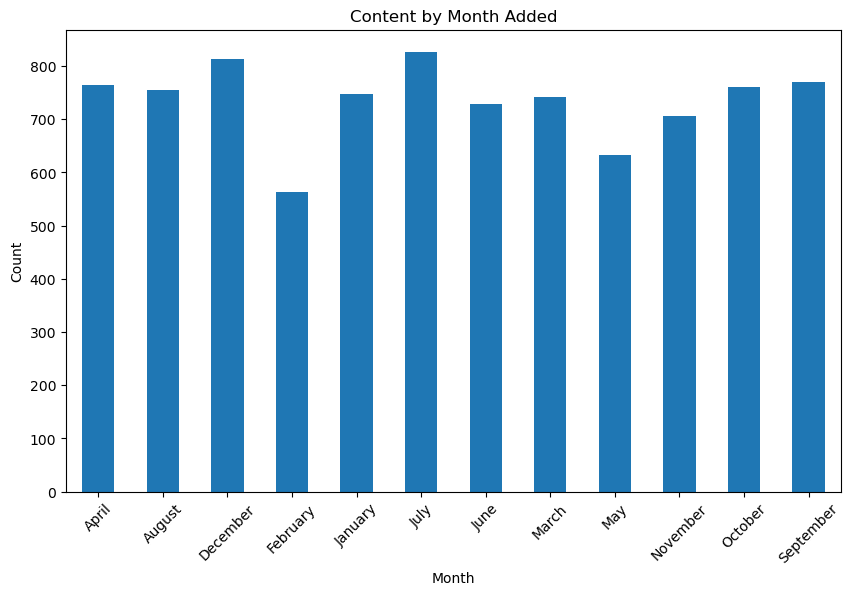

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

content_by_month = netflix_data['month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
content_by_month.plot.bar()
plt.title('Content by Month Added')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [30]:
# Top-rated 10 movies on Netflix
top_rated = netflix_data[netflix_data['rating'].isin(['PG', 'PG-13', 'R'])].sort_values(by='release_year', ascending=False).head(10)
print("Top-rated 10 movies on Netflix:")
print(top_rated[['title', 'release_year', 'rating']])

Top-rated 10 movies on Netflix:
                                 title  release_year rating
1187                  Deadly Illusions          2021      R
1088                     Thunder Force          2021  PG-13
961     The Mitchells vs. The Machines          2021     PG
889            The Woman in the Window          2021      R
6     My Little Pony: A New Generation          2021     PG
853                   Army of the Dead          2021      R
550           Fear Street Part 1: 1994          2021      R
231                      The Water Man          2021     PG
247                         Sweet Girl          2021      R
283               Misha and the Wolves          2021  PG-13


In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
# Load the dataset
netflix_data = pd.read_csv('netflix_titles.csv')

# Convert 'date_added' to datetime and handle unknown values
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

# Remove rows with unknown 'date_added'
netflix_data = netflix_data.dropna(subset=['date_added'])

# Convert duration to numeric (remove 'min' and convert to int)
netflix_data['duration'] = netflix_data['duration'].str.extract('(\d+)')
netflix_data['duration'] = pd.to_numeric(netflix_data['duration'], errors='coerce')

# Drop rows with missing or invalid duration values
netflix_data.dropna(subset=['duration'], inplace=True)


# Content-Based Recommendation System
# Create a TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
# Fill NaN values with empty string
netflix_data['description'] = netflix_data['description'].fillna('')


# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(netflix_data['description'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


# Function to get recommendations based on content similarity
def get_recommendations(title, cosine_sim=cosine_sim):
   # Get the index of the movie/TV show that matches the title
   idx = netflix_data[netflix_data['title'] == title].index[0]
   # Get the pairwsie similarity scores of all movies/TV shows with that movie/TV show
   sim_scores = list(enumerate(cosine_sim[idx]))
   # Sort the movies/TV shows based on the similarity scores
   sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
   # Get the scores of the 10 most similar movies/TV shows
   sim_scores = sim_scores[1:11]
   # Get the movie/TV show indices
   movie_indices = [i[0] for i in sim_scores]
   # Return the top 10 most similar movies/TV shows
   return netflix_data['title'].iloc[movie_indices]


# Determine Suitable Months to Release New Content
# Extract month from the 'date_added' column
netflix_data['month_added'] = netflix_data['date_added'].dt.month
# Count the number of content added each month
month_counts = netflix_data['month_added'].value_counts()
# Sort the months by the number of content added
suitable_months = month_counts.sort_values(ascending=False)
# Example usage of the recommendation system
print("Recommendations for 'The Bye Bye Man':")
print(get_recommendations('Kota Factory'))
# Display suitable months to release new content
print("Suitable Months to Release New Content:")
print(suitable_months)

# Identify the Top-rated 10 Movies on Netflix
# Filter only movies
movie1 = netflix_data[netflix_data['type'] == 'Movie']
# Sort movies by rating in descending order
top_rated_movies = movie1.sort_values(by='rating', ascending=True).head(10)
# Display top-rated movies
print("Top-rated 10 Movies on Netflix:")
print(top_rated_movies[['title', 'rating']])

Recommendations for 'The Bye Bye Man':
2272                     Drishyam
266          The Creative Indians
2091             The Bridge Curse
4076    She's Dating the Gangster
805                   Racket Boys
2690                       Code 8
1727               Girl's Revenge
8232              The Bye Bye Man
2362               The Politician
8612            Train of the Dead
Name: title, dtype: object
Suitable Months to Release New Content:
month_added
7     819
12    797
9     764
4     758
10    755
8     748
3     734
1     727
6     724
11    697
5     626
2     557
Name: count, dtype: int64
Top-rated 10 Movies on Netflix:
                                                  title rating
5597                     Tini: The New Life of Violetta      G
6784                                   Forbidden Planet      G
6153  An American Tail: The Mystery of the Night Mon...      G
8455                                   The Pirate Fairy      G
5596                                    Growing U

In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming df2 is your DataFrame and it has 'release_year', 'rating', and 'duration' columns
# Create a binary target variable: classify movies as "short" (0) if duration <= 90 minutes, "long" (1) if duration > 90 minutes
netflix_data['duration_binary'] = np.where(netflix_data['duration'] > 90, 1, 0)

# Define features and target variable
X = netflix_data[['release_year', 'rating']]
y = netflix_data['duration_binary']

# Handle categorical variable 'rating' using Label Encoding
le = LabelEncoder()
X.loc[:, 'rating'] = le.fit_transform(X['rating'])

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=8)

# Initialize and fit the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Accuracy Score:")
print(accuracy_score(y_test, y_pred_dt))
print()

# Initialize and fit the logistic regression model
lr_model = LogisticRegression(random_state=10)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression Accuracy Score:")
print(accuracy_score(y_test, y_pred_lr))
print()


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.80      0.71       474
           1       0.66      0.46      0.55       397

    accuracy                           0.65       871
   macro avg       0.65      0.63      0.63       871
weighted avg       0.65      0.65      0.64       871

Decision Tree Confusion Matrix:
[[381  93]
 [213 184]]
Decision Tree Accuracy Score:
0.6486796785304249

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       474
           1       0.59      0.61      0.60       397

    accuracy                           0.63       871
   macro avg       0.62      0.62      0.62       871
weighted avg       0.63      0.63      0.63       871

Logistic Regression Confusion Matrix:
[[304 170]
 [156 241]]
Logistic Regression Accuracy Score:
0.6257175660160735

